In [1]:
!pip install prettytable


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
!pip install geopy
!pip install folium


   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------ -------------------------- 41.0/125.4 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------  122.9/125.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 921.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/108.9 kB ? eta -:--:--
   ------- -------------------------------- 20.5/108.9 kB ? eta -:--:--
   ------------------------------------- -- 102.4/108.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 108.9/108.9 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
   ---------------------------------------- 85.1/85.1 kB ? eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
!pip install opencage


  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
     ---------------------------------------- 0.0/66.2 kB ? eta -:--:--
     ---------------------------------------- 66.2/66.2 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/379.3 kB ? eta -:--:--
   --------------------------------------- 379.3/379.3 kB 11.5 MB/s eta 0:00:00
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
   ---------------------------------------- 0.0/51.3 kB ? eta -:--:--
   ---------------------------------------- 51.3/51.3 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/89.3 kB ? eta -:--:--
   ---------------------------------------- 89.3/89.3 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
   ---------------------------------------- 44.4/44.4 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.6.2
    Uninstalling certifi-2024.6.2:
      Succe

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.2.5 requires httpx>=0.25.0, but you have httpx 0.13.3 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Bibliotecas necessarias

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import folium
import time
from datetime import datetime
from geopy.geocoders import Nominatim




In [83]:
# Caminho para o arquivo concatenado (substitua pelo caminho correto)
file_path = './data/concatenated_output.txt'

# Ler o arquivo (ajuste o delimitador conforme necessário, como '\t' ou ',')
df = pd.read_csv(file_path, sep='\t', header=None)

# Definir os nomes das colunas
columns = [
    'PT', 'AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS', 'LA', 'DT', 'CT', 'CY',
    'CL', 'SP', 'HO', 'DE', 'ID', 'AB', 'C1', 'C3', 'RP', 'EM', 'RI', 'OI', 'FU', 'FP', 'FX', 'CR',
    'NR', 'TC', 'Z9', 'U1', 'U2', 'PU', 'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL',
    'IS', 'PN', 'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'DL', 'D2', 'EA', 'PG', 'WC', 'WE', 'SC',
    'GA', 'PM', 'OA', 'HC', 'HP', 'DA', 'UT'
]

# Atribuir os nomes das colunas ao DataFrame
df.columns = columns

# Análise de Citações de Artigos

Esse código realiza uma análise de citações de artigos a partir de um arquivo dataset. Ele calcula a média de citações por ano e exibe os 10 artigos mais citados em uma tabela formatada.

In [84]:


# Converter as colunas 'TC' (Times Cited) e 'PY' (Publication Year) para numérico
df['TC'] = pd.to_numeric(df['TC'], errors='coerce')
df['PY'] = pd.to_numeric(df['PY'], errors='coerce')

# Obter o ano atual
current_year = datetime.now().year

# Calcular a Average Citation Per Year
df['Average Citation Per Year'] = df['TC'] / (current_year - df['PY'] + 1)

# Ordenar os artigos por maior número de citações
df_sorted = df[['TI', 'TC', 'Average Citation Per Year']].sort_values(by='TC', ascending=False)

# Selecionar os 10 primeiros artigos
top_10_articles = df_sorted.head(10)

# Criar uma tabela usando PrettyTable
table = PrettyTable()

# Adicionar colunas à tabela
table.field_names = ["Number", "Literature title", "Total citation", "Average citation per year"]

# Adicionar os dados à tabela, formatando conforme solicitado
for index, row in top_10_articles.iterrows():
    table.add_row([
        top_10_articles.index.get_loc(index) + 1,  # Número
        row['TI'],                                  # Título
        int(row['TC']),                             # Total de citações como inteiro
        f"{row['Average Citation Per Year']:.1f}"  # Média de citações com um decimal
    ])

# Ajustar o alinhamento da tabela
table.align["Literature title"] = "c"  # Alinhar à esquerda
table.align["Total citation"] = "c"     # Alinhar ao centro
table.align["Average citation per year"] = "c"  # Alinhar ao centro

# Formatar a tabela para uma apresentação mais limpa
table.padding_width = 1  # Espaçamento entre colunas
table.border = True       # Borda ao redor da tabela
table.header = True       # Mostrar cabeçalho

# Exibir a tabela formatada
print(table)


+--------+------------------------------------------------------------------------------------------------------------------------------+----------------+---------------------------+
| Number |                                                       Literature title                                                       | Total citation | Average citation per year |
+--------+------------------------------------------------------------------------------------------------------------------------------+----------------+---------------------------+
|   1    |        Real-Time Detection of False Data Injection Attacks in Smart Grid: A Deep Learning-Based Intelligent Mechanism        |      480       |            60.0           |
|   2    |                                      Smart Grids: A Cyber-Physical Systems Perspective                                       |      438       |            48.7           |
|   3    |                     A Survey on the Detection Algorithms for False Data In

# Análise dos sete jornais com maior numero de artigos publicados

Esse código realiza uma análise dos jornais com maior numero de artigos a partir de um arquivo dataset. No dataset ele conta os numeros de publicações por jornal e ordena quais são os sete jornais com maiores publicações.

In [85]:


# Supondo que a coluna 'SO' contenha os títulos dos jornais
# Contar o número de publicações por jornal
journal_counts = df['SO'].value_counts().reset_index()

# Renomear as colunas
journal_counts.columns = ['Journal title', 'Number of literatures published']

# Adicionar uma coluna de numeração
journal_counts.insert(0, 'Number', range(1, len(journal_counts) + 1))

# Exibir os 7 principais jornais
top_journals = journal_counts.head(7)

# Criar uma tabela formatada com PrettyTable
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = top_journals.columns.tolist()

for index, row in top_journals.iterrows():
    table.add_row(row)

# Ajustar o alinhamento da tabela
table.align["Journal title"] = "l"  # Alinhar à esquerda
table.align["Number of literatures published"] = "r"  # Alinhar à direita

# Exibir a tabela formatada
print(table)


+--------+---------------------------------------------+---------------------------------+
| Number | Journal title                               | Number of literatures published |
+--------+---------------------------------------------+---------------------------------+
|   1    | IEEE ACCESS                                 |                             129 |
|   2    | ENERGIES                                    |                              82 |
|   3    | IEEE TRANSACTIONS ON SMART GRID             |                              51 |
|   4    | SENSORS                                     |                              37 |
|   5    | IEEE INTERNET OF THINGS JOURNAL             |                              35 |
|   6    | ELECTRONICS                                 |                              29 |
|   7    | IEEE TRANSACTIONS ON INDUSTRIAL INFORMATICS |                              28 |
+--------+---------------------------------------------+---------------------------------+

# Análise dos Dez Autores com Maior Número de Artigos Publicados

O código apresentado lê um conjunto de dados extraído utilizando o VOSviewer, uma ferramenta amplamente utilizada para análise de coautoria e visualização de redes de pesquisa. O dataset original foi obtido do Web of Science, contendo informações sobre publicações e citações.

In [86]:
# Caminho para o arquivo analyze.txt
file_path = './data/autores.txt'  # Atualize para o caminho correto do seu arquivo

# Ler o arquivo
authors_df = pd.read_csv(file_path, sep='\t', header=0)

# Renomear colunas para facilitar o acesso
authors_df.columns = ['Authors', 'Record Count', '% of Total']

# Obter os 10 principais autores por número de registros
top_authors = authors_df.nlargest(10, 'Record Count')

# Exibir a tabela de autores
print(top_authors)

               Authors  Record Count  % of Total
0             Javaid N          16.0       0.862
1             Fouda MM          12.0       0.646
2             Ismail M          12.0       0.646
3           Serpedin E          11.0       0.592
4              Zhang L          11.0       0.592
5              Ahmed S          10.0       0.539
6              Badr MM          10.0       0.539
7              Dong ZY          10.0       0.539
8           Ibrahem MI          10.0       0.539
9  Mohammadi-ivatloo B          10.0       0.539


# Gráfico de numero de literaturas publicadas e número total de citações por ano

O código apresentado realiza uma análise bibliométrica dos estudos literários publicados e suas citações ao longo dos anos. Primeiramente, o DataFrame é ajustado para remover a última coluna desnecessária e as colunas relevantes, como 'TC' (Total de Citações) e 'PY' (Ano de Publicação), são convertidas para valores numéricos.

Em seguida, os dados são agrupados por ano, calculando a soma total de citações e o número de publicações para cada ano. A tabela resultante, que contém o ano, o total de citações e o número de literaturas publicadas, é então salva em um arquivo CSV para posterior análise.

O gráfico gerado ilustra a evolução do número de estudos literários publicados e o total de citações ao longo dos anos de 2005 a 2020. A linha contínua laranja representa o número de literaturas publicadas, enquanto a linha tracejada vermelha mostra o total de citações. A visualização destaca um aumento significativo nas publicações e nas citações a partir de 2016, sugerindo um crescimento no interesse e na pesquisa sobre o tema em questão.

      Year  Total Citations  Number of Literatures Published
0   2003.0             17.0                                2
1   2004.0             24.0                                4
2   2005.0             29.0                                3
3   2006.0              6.0                                6
4   2007.0             94.0                                4
5   2008.0            133.0                                6
6   2009.0             21.0                                2
7   2010.0              2.0                                1
8   2011.0            334.0                                7
9   2012.0            392.0                               10
10  2013.0            497.0                               16
11  2014.0            597.0                               21
12  2015.0            866.0                               33
13  2016.0           1245.0                               41
14  2017.0           1337.0                               54
15  2018.0           268

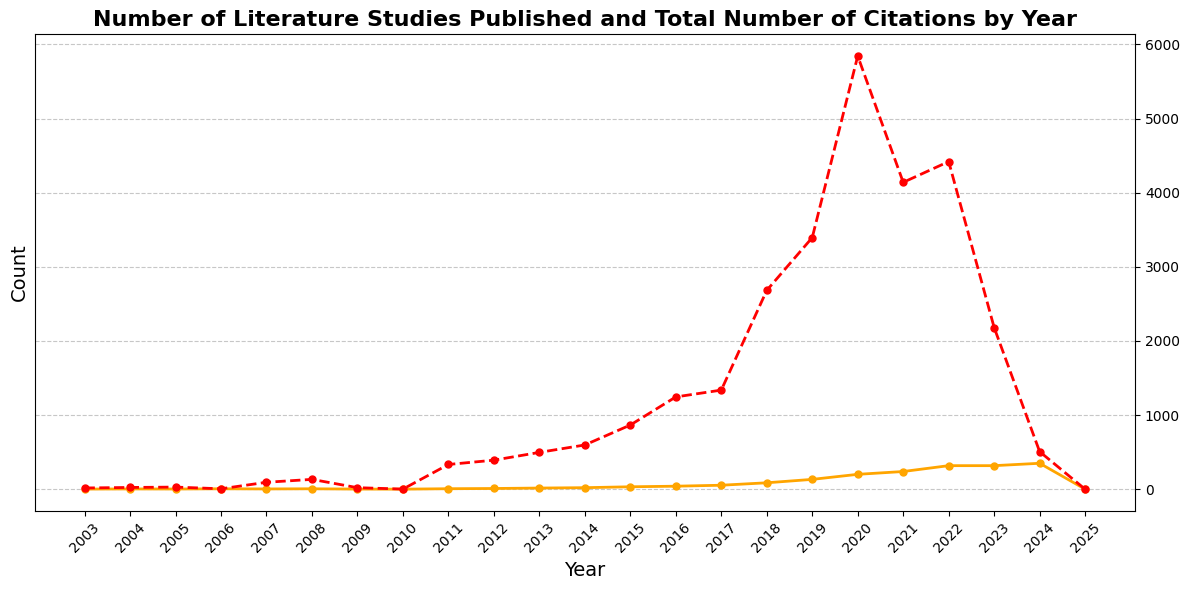

In [87]:
df = df.iloc[:, :-1]
# Atribuir os nomes das colunas ao DataFrame
df.columns = columns

# Converter as colunas 'TC' (Total Citations) e 'PY' (Publication Year) para numérico
df['TC'] = pd.to_numeric(df['TC'], errors='coerce')
df['PY'] = pd.to_numeric(df['PY'], errors='coerce')

# Agrupar os dados por ano e calcular a soma das publicações e citações
grouped_data = df.groupby('PY').agg({
    'TC': 'sum',
    'PT': 'count'  # Contar o número de publicações
}).reset_index()

# Renomear as colunas
grouped_data.columns = ['Year', 'Total Citations', 'Number of Literatures Published']

# Exibir a tabela resultante
print(grouped_data)

# Salvar a tabela em um arquivo CSV
output_file_path = 'data/literature_citation_data.csv'
grouped_data.to_csv(output_file_path, index=False)
print(f'Tabela salva em: {output_file_path}')

# Plotar os dados
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['Year'], grouped_data['Number of Literatures Published'], marker='o',
         label='Number of Literatures Published', color='orange', linestyle='-', linewidth=2, markersize=5)
plt.plot(grouped_data['Year'], grouped_data['Total Citations'], marker='o',
         label='Number of Citations', color='red', linestyle='--', linewidth=2, markersize=5)

# Adicionar título e rótulos
plt.title('Number of Literature Studies Published and Total Number of Citations by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(grouped_data['Year'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Configurar os números do eixo Y para ficarem à direita
plt.gca().yaxis.set_ticks_position('right')
plt.gca().yaxis.tick_right()

# Remover a legenda
# plt.legend(fontsize=12)  # Removido conforme solicitado

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Análise dos Dez Principais Países Publicadores

Este código analisa um conjunto de dados extraído que contém informações sobre publicações de literatura acadêmica por país. O arquivo `country.txt` foi lido e processado para identificar quais países se destacam na produção de literatura.

## Processos Realizados:

1. **Carregamento dos Dados:** O arquivo é carregado em um DataFrame do Pandas, onde as colunas são renomeadas para facilitar a manipulação:
   - **ID:** Identificação do registro
   - **Country:** Nome do país
   - **Documents:** Número de documentos publicados
   - **Citations:** Número de citações
   - **Total Link Strength:** Força total de links

2. **Formatação dos Nomes dos Países:** As primeiras letras de cada nome de país são convertidas para maiúsculas para garantir uma apresentação consistente.

3. **Extração dos Principais Países:** O código filtra os dez países com o maior número de documentos publicados utilizando o método `nlargest()`. Isso permite que as principais contribuições sejam destacadas.

4. **Cálculo da Porcentagem de Documentos:** A porcentagem de documentos publicados por cada país em relação ao total de documentos é calculada para fornecer uma perspectiva adicional sobre a contribuição de cada país.

5. **Visualização dos Resultados:** Um gráfico de barras é gerado, ilustrando a quantidade de documentos para cada um dos dez principais países. Além disso, uma linha que representa a porcentagem de documentos é adicionada, permitindo uma análise mais clara das contribuições.


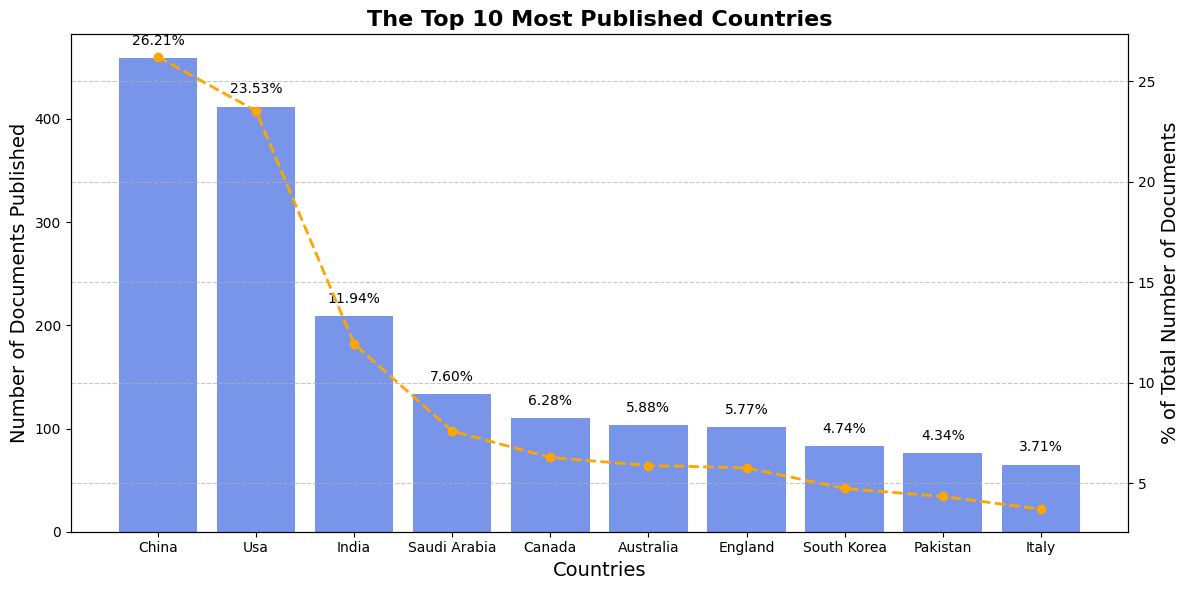

         Country  Documents  Percentage
61         China        459   26.213592
91           Usa        412   23.529412
31         India        209   11.936037
70  Saudi Arabia        133    7.595660
11        Canada        110    6.282125
3      Australia        103    5.882353
20       England        101    5.768132
77   South Korea         83    4.740148
59      Pakistan         76    4.340377
37         Italy         65    3.712164


In [92]:
# Caminho para o arquivo country.txt
country_file_path = 'data/country.txt'  # Atualize para o caminho correto do seu arquivo

# Ler o arquivo
country_df = pd.read_csv(country_file_path, sep='\t', header=0)

# Renomear colunas para facilitar o acesso
country_df.columns = ['ID', 'Country', 'Documents', 'Citations', 'Total Link Strength']

# Colocar a primeira letra de cada país em maiúscula
country_df['Country'] = country_df['Country'].str.title()

# Obter os 10 principais países por número de documentos
top_countries = country_df.nlargest(10, 'Documents')[['Country', 'Documents']]

# Calcular a porcentagem de documentos
total_documents = top_countries['Documents'].sum()
top_countries['Percentage'] = (top_countries['Documents'] / total_documents) * 100

# Plotar o gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras
bars = ax1.bar(top_countries['Country'], top_countries['Documents'], color='royalblue', alpha=0.7)
ax1.set_xlabel('Countries', fontsize=14)
ax1.set_ylabel('Number of Documents Published', fontsize=14)
ax1.set_title('The Top 10 Most Published Countries', fontsize=16, fontweight='bold')

# Adicionar porcentagem acima de cada barra
for bar, percentage in zip(bars, top_countries['Percentage']):
    yval = bar.get_height()
    # Exibir a porcentagem acima da barra
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)

# Criar um segundo eixo y para a porcentagem
ax2 = ax1.twinx()
ax2.plot(top_countries['Country'], top_countries['Percentage'], color='orange', marker='o', linestyle='--', linewidth=2)
ax2.set_ylabel('% of Total Number of Documents', fontsize=14)

# Exibir o gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Imprimir a tabela de países
print(top_countries)

# Análise das Dez Principais Instituições de Pesquisa

Este código analisa um conjunto de dados extraído que contém informações sobre publicações de literatura acadêmica, especificamente focando nas instituições de pesquisa. O arquivo `universidade.txt` foi lido e processado para identificar quais instituições têm se destacado na produção de literatura. Os dados foram extraídos a partir do conjunto original obtido no **Web of Science** e analisados usando o **VOSviewer** para identificar as universidades.

# Processos Realizados:

1. **Carregamento dos Dados**: O arquivo é carregado em um DataFrame do Pandas, onde as colunas são renomeadas para facilitar a manipulação:
   - **'Institution'**: Nome da instituição de pesquisa
   - **'Record Count'**: Número de publicações registradas
   - **'% of Total'**: Percentual do total de publicações

2. **Extração das Principais Instituições**: O código filtra as dez instituições com o maior número de publicações usando o método `nlargest()`, permitindo que as principais contribuições sejam destacadas.

3. **Visualização dos Resultados**: Um gráfico de barras horizontais é gerado, ilustrando a quantidade de publicações para cada uma das dez principais instituições.


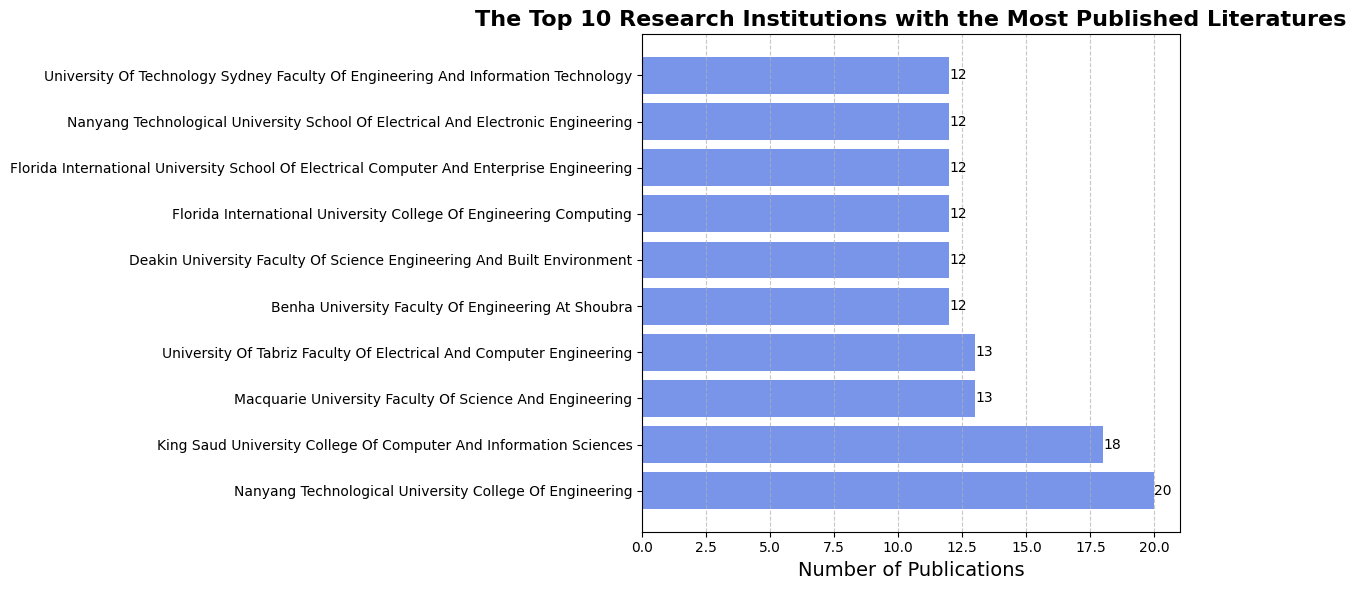

In [24]:
# Caminho para o arquivo analyze.txt
file_path = './data/universidade.txt'  # Atualize para o caminho correto do seu arquivo

# Ler o arquivo
data = pd.read_csv(file_path, sep='\t')

# Renomear colunas para facilitar o acesso
data.columns = ['Institution', 'Record Count', '% of Total']

# Obter os 10 principais instituições por número de publicações
top_institutions = data.nlargest(10, 'Record Count')[['Institution', 'Record Count']]

# Plotar o gráfico
plt.figure(figsize=(12, 6))
bars = plt.barh(top_institutions['Institution'], top_institutions['Record Count'], color='royalblue', alpha=0.7)
plt.xlabel('Number of Publications', fontsize=14)
plt.title('The Top 10 Research Institutions with the Most Published Literatures', fontsize=16, fontweight='bold')

# Adicionar os valores das publicações acima de cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Análise das Publicações de Literatura e Citações

O primeiro bloco de código realiza uma análise das publicações de literatura acadêmica e suas citações ao longo dos anos. Inicialmente, o código carrega um conjunto de dados que contém informações sobre publicações, incluindo o ano de publicação e o total de citações. A partir disso, ele processa os dados para calcular a soma total de citações e o número de publicações por ano. Os dados são agrupados, renomeados e, em seguida, salvos em um arquivo CSV para referência futura.

Após o processamento dos dados, um gráfico é gerado para visualizar a evolução do número de publicações e o total de citações ao longo dos anos. O gráfico é estruturado com linhas distintas que representam as publicações e as citações, permitindo uma comparação visual clara entre as duas métricas.

In [71]:
# Caminho para o arquivo (substitua pelo caminho correto do seu arquivo)
file_path = 'data/concatenated_output.txt'  # Atualize para o caminho correto do seu arquivo

# Ler o arquivo
df = pd.read_csv(file_path, sep='\t', header=0)

# Exibir as primeiras linhas do DataFrame para entender os dados
print("Dados do DataFrame:")
print(df.head())

# Extrair a coluna C1 (Endereço)
addresses = df['C1']

# Função para extrair endereços
def extract_addresses(text):
    if isinstance(text, str):
        # Regex para capturar diferentes formatos de endereço
        address_pattern = r'\[.*?\] (.*?)(?:, \s*\w{2}-\d{5},\s*([A-Za-z\s]+)|$)'  # Captura endereços com ou sem um código postal
        matches = re.findall(address_pattern, text)
        cleaned_matches = [match[0].strip() for match in matches]  # Remove espaços em branco extras
        return cleaned_matches
    return []

# Aplicar a função de extração
cleaned_addresses = addresses.apply(extract_addresses)

# Exibir os endereços limpos
print("Endereços extraídos:")
for index, address_list in enumerate(cleaned_addresses):
    if address_list:
        print(f"Endereços para autor {df['AU'].iloc[index]}: {address_list}")
    else:
        print(f"Endereço não encontrado para autor {df['AU'].iloc[index]}.")

# Contar total de endereços encontrados
total_found = cleaned_addresses.apply(len).sum()
total_total = len(addresses)
print(f"\nTotal de endereços encontrados: {total_found} de {total_total} disponíveis.")

# Contar quantos autores têm endereços
authors_with_addresses = cleaned_addresses[cleaned_addresses.str.len() > 0].count()
print(f"Número de autores com endereços: {authors_with_addresses}")


Dados do DataFrame:
  PT                                                 AU   BA   BE   GP  \
0  J                           Stypinski, M; Niemiec, M  NaN  NaN  NaN   
1  J  Blazakis, K; Schetakis, N; Bonfini, P; Stavrak...  NaN  NaN  NaN   
2  J  Wang, CY; Sun, J; Xu, XX; Zou, B; Zhang, M; Ta...  NaN  NaN  NaN   
3  J     Jafari, M; Kavousi-Fard, A; Chen, T; Karimi, M  NaN  NaN  NaN   
4  J  Wang, XY; Luo, XY; Zhang, MY; Jiang, ZP; Guan, XP  NaN  NaN  NaN   

                                                  AF   BF   CA  \
0                 Stypinski, Milosz; Niemiec, Marcin  NaN  NaN   
1  Blazakis, Konstantinos; Schetakis, Nikolaos; B...  NaN  NaN   
2  Wang, Chunye; Sun, Jian; Xu, Xiaoxin; Zou, Bin...  NaN  NaN   
3  Jafari, Mina; Kavousi-Fard, Abdollah; Chen, Ta...  NaN  NaN   
4  Wang, Xinyu; Luo, Xiaoyuan; Zhang, Mingyue; Ji...  NaN  NaN   

                                                  TI  \
0  Security of Neural Network-Based Key Agreement...   
1  Towards Automated Model

# Análise das Principais Instituições de Pesquisa

O segundo bloco de código é responsável por analisar e visualizar as principais instituições de pesquisa com base no número de publicações registradas. A partir de um arquivo que contém dados sobre publicações acadêmicas, o código lê os dados e renomeia as colunas para facilitar a manipulação. As instituições são filtradas para identificar as dez com o maior número de publicações.

Um gráfico de barras horizontais é então gerado para representar visualmente o número de publicações por cada uma das principais instituições. Essa visualização permite uma comparação rápida e eficaz entre as instituições, destacando as que mais contribuíram para a produção acadêmica.

In [101]:
from opencage.geocoder import OpenCageGeocode
import time
import folium

# Inicializar o geocodificador OpenCage
key = 'd37e6e3918004415ac021cc29141cbe0'
geocoder = OpenCageGeocode(key)

# Listas para armazenar coordenadas e endereços que falharam na geocodificação
coordinates = []
failed_addresses = []

# Geocodificar endereços
for address_list in cleaned_addresses:
    for address in address_list:
        try:
            results = geocoder.geocode(address)
            if results:
                coordinates.append((results[0]['geometry']['lat'], results[0]['geometry']['lng']))
            else:
                failed_addresses.append(address)  # Adicionar à lista de falhas
                coordinates.append((None, None))
            time.sleep(3)  # Atraso de 3 segundos entre requisições
        except Exception as e:
            print(f"Erro ao geocodificar {address}: {e}")
            failed_addresses.append(address)  # Adicionar à lista de falhas
            coordinates.append((None, None))

# Exibir endereços que não foram geocodificados
if failed_addresses:
    print("Endereços que falharam na geocodificação:")
    for addr in failed_addresses:
        print(addr)

# Criar um mapa
m = folium.Map(location=[20, 0], zoom_start=2)

# Adicionar marcadores ao mapa
for coord in coordinates:
    if coord[0] is not None and coord[1] is not None:
        folium.Marker(location=coord).add_to(m)

# Salvar o mapa em um arquivo HTML
m.save("data/map.html")

# Exibir o mapa no notebook
display(m)


Endereços que falharam na geocodificação:
Tech Univ Crete, Sch Elect & Comp Engn, Khania 73100, Greece; [Blazakis, Konstantinos] QUBITECH, Quantum Technol, Athens 15231, Greece; [Schetakis, Nikolaos] Tech Univ Crete, Inst Computat Mech & Optimizat, Sch Prod Engn & Management, Khania 73100, Greece; [Bonfini, Paolo] Quantum Innovat Pc, Khania 73100, Greece; [Bonfini, Paolo] Alma Sistemi Srl, IT-00012 Guidonia, Italy; [Stavrakakis, Konstantinos] Delft Univ Technol, Dept Quantum & Comp Engn, NL-2628 Delft, Netherlands; [Karapidakis, Emmanuel; Katsigiannis, Yiannis] Hellenic Mediterranean Univ, Dept Elect & Comp Engn, Iraklion 71410, Greece
Shiraz Univ Technol, Dept Elect & Elect Engn, Shiraz, Iran; [Chen, Tao] Southeast Univ, Sch Elect Engn, Nanjing, Peoples R China; [Karimi, Mazaher] Univ Vaasa, Sch Technol & Innovat, Vaasa, Finland
Effat Univ, Coll Engn, Jeddah 22332, Saudi Arabia; [Qaisar, Saeed Mian] Effat Univ, Energy & Technol Ctr, Commun & Signal Proc Lab, Jeddah 22332, Saudi Arabia